In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /home/mabitbol/GBT-S140/analysis/

/home/mabitbol/GBT-S140/analysis


In [3]:
import foregrounds as fg
from scipy.optimize import curve_fit
import emcee
import corner

In [4]:
from __future__ import unicode_literals

figsize(16, 10)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [5]:
fdg = np.loadtxt('/home/mabitbol/GBT-S140/externaldata/fd_G107.20+05.20.dat')

In [6]:
cfs = fdg[:, 0] * 1.e9
mask = cfs < 4.e12
cfs = cfs[mask]
cjys = fdg[:, 1][mask]
cerrs = fdg[:, 2][mask]
cfit = fdg[:, 3][mask]
crem = fdg[:, 4][mask]
cremerr = fdg[:, 5][mask]

In [7]:
freqs = np.logspace(8, 13, 2000)
nu = freqs*1.e-9

In [8]:
beam = pi*(1.*pi/180.)**2
beam2 = pi*((0.16/60.)*pi/180.)**2

In [9]:
nfreqs = np.array([4.575, 5.625, 6.125]) * 1.e9
newdata = np.array([ 17.05, 17.66, 19.5])
nerrs = newdata * 0.1

In [10]:
bigfs = np.concatenate([cfs, nfreqs])
bigdata = np.concatenate([cjys, newdata])
bigerrs = np.concatenate([cerrs, nerrs])

In [11]:
def signal(freqs, EM, Asd, nup, Ad, Bd, Td, Acmb):
    fffit = fg.freefreep(freqs, EM=EM, Te=8000)
    amefit = fg.ame(freqs, Asd=Asd, nup=nup) 
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td)
    ccmb = fg.cmb(freqs, A=Acmb)
    return (fffit + dustfit + amefit + ccmb) * beam

In [12]:
def signal2(freqs, EM1, EM2, abeam, Ad, Bd, Td, Acmb):
    fffit = fg.freefreep(freqs, EM=EM1, Te=8000) * beam
    fffit2 = fg.freefreep(freqs, EM=EM2, Te=8000) * abeam
    dustfit = fg.thermal_dust(freqs, Ad=Ad, Bd=Bd, Td=Td) * beam
    ccmb = fg.cmb(freqs, A=Acmb) * beam
    return fffit + fffit2 + dustfit + ccmb

In [13]:
pn = np.array([100., 1.e-3, 20.e9, 1.e-4, 2., 20., 30.e-6])
x = curve_fit(signal, cfs, cjys, p0=pn, sigma=cerrs, absolute_sigma=True)
pfit1 = x[0]

In [14]:
pn2 = np.array([100., 1.e6, beam2, 1.e-4, 2., 20., 30e-6])
y = curve_fit(signal2, cfs, cjys, p0=pn2, sigma=cerrs, absolute_sigma=True)
pfit2 = y[0]

In [15]:
pn = np.array([100., 1.e-3, 20.e9, 1.e-4, 2., 20., 30.e-6])
x = curve_fit(signal, bigfs, bigdata, p0=pn, sigma=bigerrs, absolute_sigma=True)
pfit3 = x[0]

In [16]:
pn2 = np.array([100., 1.e6, beam2, 1.e-4, 2., 20., 30e-6])
y = curve_fit(signal2, bigfs, bigdata, p0=pn2, sigma=bigerrs, absolute_sigma=True)
pfit4 = y[0]

In [17]:
rchisq1 = np.sum( ( cjys - signal(cfs, *pfit1))**2 / cerrs**2 ) / float(len(cjys) - len(pn))
print rchisq1

1.120652483


In [18]:
rchisq2 = np.sum( ( cjys - signal2(cfs, *pfit2))**2 / cerrs**2 ) / float(len(cjys) - len(pn2))
print rchisq2

0.600470073579


In [19]:
rchisq3 = np.sum( ( cjys - signal(cfs, *pfit3))**2 / cerrs**2 ) / float(len(cjys) - len(pn))
print rchisq3

1.56012197345


In [20]:
rchisq4 = np.sum( ( cjys - signal2(cfs, *pfit4))**2 / cerrs**2 ) / float(len(cjys) - len(pn2))
print rchisq4

11.7807987234


In [21]:
print "EM, Asd, nup, Ad, Bd, Td, Acmb"
print pfit1
print pfit3

EM, Asd, nup, Ad, Bd, Td, Acmb
[  2.66696845e+02   8.22504598e-04   2.93018117e+10   6.95658590e-04
   1.82933273e+00   2.05216919e+01   5.47940263e-05]
[  2.17163157e+02   9.91685247e-04   2.94732871e+10   6.91647955e-04
   1.89359964e+00   2.00817959e+01   7.93422338e-05]


In [22]:
print "EM1, EM2, abeam, Ad, Bd, Td, Acmb"
print pfit2
print pfit4

EM1, EM2, abeam, Ad, Bd, Td, Acmb
[  2.02185486e+02   3.02982127e+07   9.25795440e-09   7.04811387e-04
   1.49909134e+00   2.32273004e+01  -7.38134156e-05]
[  1.20121819e+02   1.00743497e+07   2.23605260e-08   6.95127348e-04
   2.05061310e+00   1.89639910e+01   6.27800723e-05]


In [23]:
np.sqrt(pfit2[2] / pi) * 180. / pi * 60.

0.1866192609257353

In [24]:
np.sqrt(pfit4[2] / pi) * 180. / pi * 60.

0.29002801774223985

(10, 100000.0)

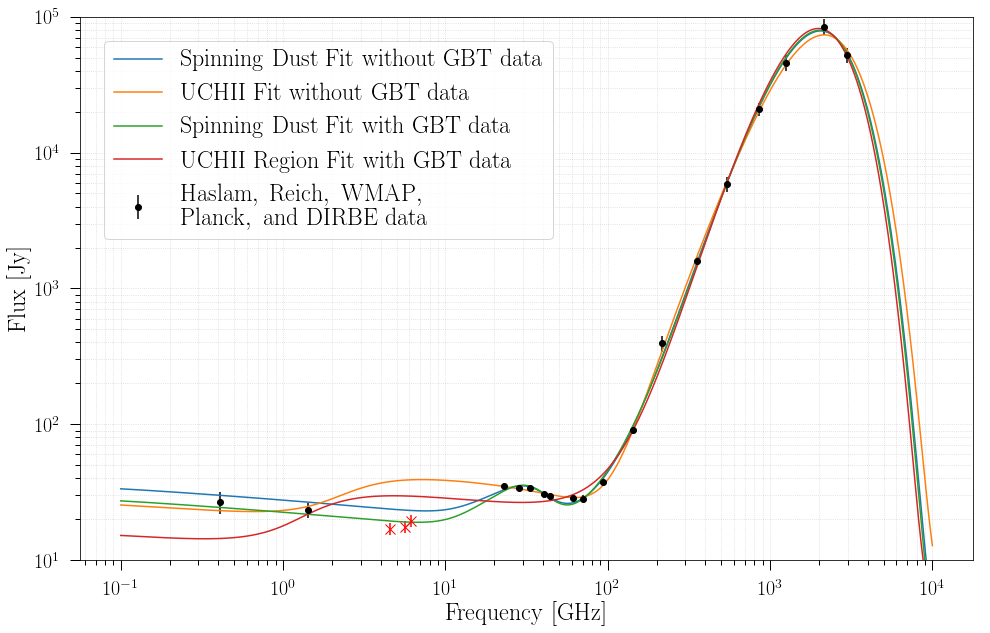

In [25]:
plot(nu, signal(freqs, *pfit1), label='$\mathrm{Spinning\ Dust\ Fit\ without\ GBT\ data}$')
plot(nu, signal2(freqs, *pfit2), label='$\mathrm{UCHII\ Fit\ without\ GBT\ data}$')
plot(nu, signal(freqs, *pfit3), label='$\mathrm{Spinning\ Dust\ Fit\ with\ GBT\ data}$')
plot(nu, signal2(freqs, *pfit4), label='$\mathrm{UCHII\ Region\ Fit\ with\ GBT\ data}$')
errorbar(cfs*1.e-9, cjys, yerr=cerrs, fmt='ko',\
         label='$\mathrm{Haslam,\ Reich,\ WMAP,}$\n$\mathrm{Planck,\ and\ DIRBE\ data}$')
errorbar(nfreqs*1e-9, newdata, yerr=nerrs, fmt='rx', markersize=10)

xscale('log')
yscale('log')
xlabel('$\mathrm{Frequency\ [GHz]}$')
ylabel('$\mathrm{Flux\ [Jy]}$')
legend(loc=2, ncol=1)
grid(ls='dotted', alpha=0.5)
grid(which='minor', ls='dotted', alpha=0.5)
ylim(10, 1e5)
#savefig('../notebooks/fullspectrum_with_gbt.pdf', format='pdf')

In [45]:
ff2a = fg.freefreep(freqs, EM=pfit2[1]) * pfit2[2]
ff2 = fg.freefreep(freqs, EM=pfit4[1]) * pfit4[2]

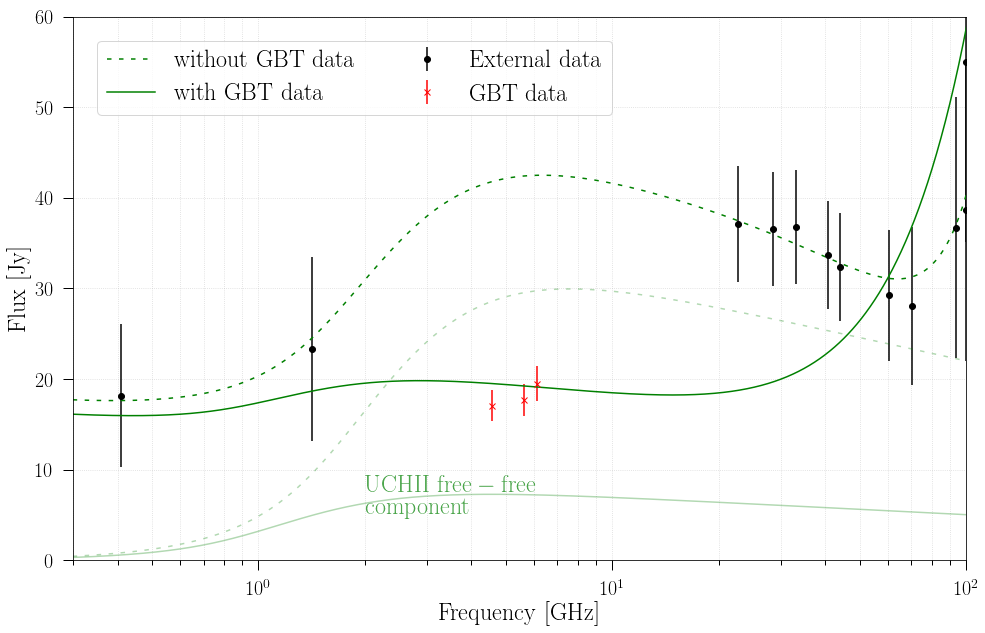

In [58]:
plot(nu, signal2(freqs, *pfit2), 'green', ls='dashed', dashes=(3,5), label='$\mathrm{without\ GBT\ data}$')
plot(nu, signal2(freqs, *pfit4), 'green', label='$\mathrm{with\ GBT\ data}$')
errorbar(cfs*1.e-9, cjys, yerr=cerrs, fmt='ko', label='$\mathrm{External\ data}$')
errorbar(nfreqs*1.e-9, newdata, yerr=nerrs, fmt='rx', label='$\mathrm{GBT\ data}$')

alpha = 0.3
plot(nu, ff2, 'green', alpha=alpha)
plot(nu, ff2a, 'green', alpha=alpha, ls='dashed', dashes=(3,5))

xscale('log')
ylim(0, 60)
xlim(0.3, 100)
xlabel('$\mathrm{Frequency\ [GHz]}$')
ylabel('$\mathrm{Flux\ [Jy]}$')
legend(loc=2, ncol=2)
grid(ls='dotted', alpha=0.5)
grid(which='minor', ls='dotted', alpha=0.5)
text(2, 5, '$\mathrm{UCHII\ free-free}$\n $\mathrm{component}$', fontsize=24, color='green', alpha=0.7);
savefig('../notebooks/freefreefit.pdf', format='pdf')

In [59]:
ame0a = fg.ame(freqs, pfit1[1], pfit1[2]) * beam
ame0 = fg.ame(freqs, pfit3[1], pfit3[2]) * beam

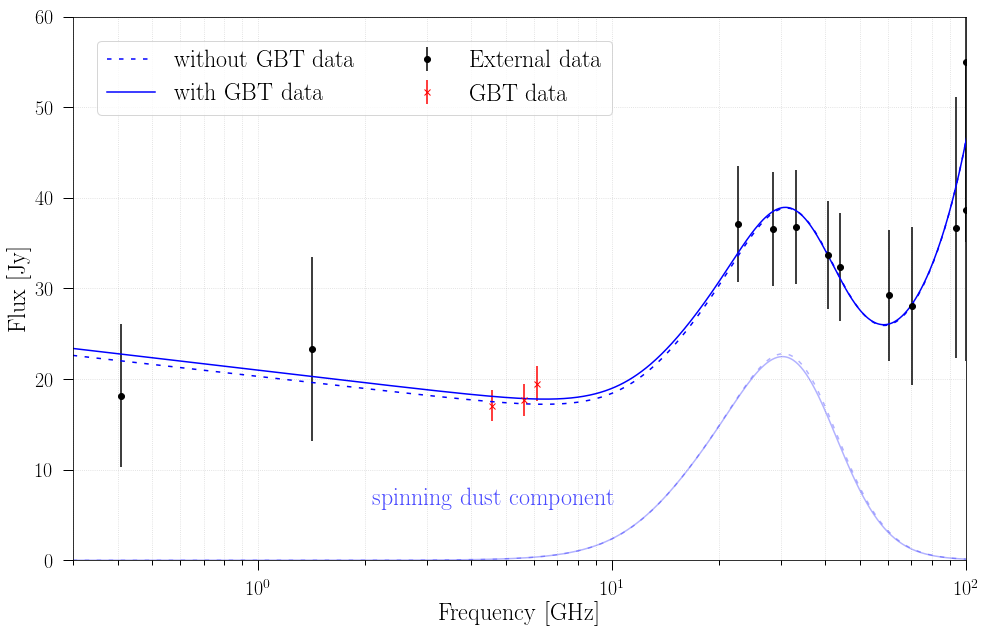

In [61]:
plot(nu, signal(freqs, *pfit1), 'blue', ls='dashed', dashes=(3,5), label='$\mathrm{without\ GBT\ data}$')
plot(nu, signal(freqs, *pfit3), 'blue', label='$\mathrm{with\ GBT\ data}$')
errorbar(cfs*1.e-9, cjys, yerr=cerrs, fmt='ko', label='$\mathrm{External\ data}$')
errorbar(nfreqs*1.e-9, newdata, yerr=nerrs, fmt='rx', label='$\mathrm{GBT\ data}$')

alpha = 0.3
plot(nu, ame0, 'blue', alpha=alpha)
plot(nu, ame0a, 'blue', alpha=alpha, ls='dashed', dashes=(3,5))

xscale('log')
ylim(0, 60)
xlim(0.3, 100)
xlabel('$\mathrm{Frequency\ [GHz]}$')
ylabel('$\mathrm{Flux\ [Jy]}$')
legend(loc=2, ncol=2)
grid(ls='dotted', alpha=0.5)
grid(which='minor', ls='dotted', alpha=0.5)
text(2.1, 6, '$\mathrm{spinning\ dust\ component}$', fontsize=24, color='blue', alpha=0.7);
savefig('../notebooks/spinningdustfit.pdf', format='pdf')